<center><h1><u>PROJECT: <b>DIABETES PREDICTION - SUPERVISED ML</b></u></h1></center>

<h1><b>Introduction</b></h1>

<div style="text-align: justify;">
<b>Diabetes Mellitus</b> or <b>Diabetes</b> is a chronic metabolic disorder that occurs when the body either does not produce enough insulin or cannot effectively use the insulin it produces, leading to elevated blood glucose levels. Diabetes prediction is a crucial area of research in healthcare, as the condition is a major global health concern with increasing prevalence and severe complications, including cardiovascular disease, kidney failure, and neuropathy (<a href="https://www.who.int/news-room/fact-sheets/detail/diabetes">WHO: Diabetes</a>). This highlights the importance of early diagnosis and prevention strategies. This project explores the effectiveness of machine learning techniques in predicting diabetes based on various clinical, genetic, and lifestyle factors.
</div>

<h1><b>Dataset Information</b></h1>

<div style="text-align: justify;">
The dataset used in this project can be downloaded from <a href="https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators">UCI ML Repository</a>. The dataset used is extracted from the Behavioral Risk Factor Surveillance System (BRFSS), which collects state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services through health-related telephone surveys.
</div>

<h1><b>Project Goal</b></h1>

<div style="text-align: justify;">
The primary goal of this project is to develop a model that predicts the likelihood of diabetes or pre-diabetes based on input parameters such as gender, age, symptoms, and lifestyle factors. Additionally, the project aims to analyze the risk factors that are most predictive of diabetes risk while testing the usability of BRFSS in providing accurate predictions.
</div>

<br>

<center><h1><b>IMPORTING GENERAL LIBRARIES</b></h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from termcolor import colored

In [2]:
#library configurations
%matplotlib inline
sns.set_theme(palette='flare')
pd.pandas.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

<br>

<center><h1><b>IMPORTING DATASET</b></h1></center>

In [3]:
# pip install ucimlrepo

In [4]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

In [5]:
# df = pd.DataFrame(cdc_diabetes_health_indicators.data.features)  
# df['target'] = cdc_diabetes_health_indicators.data.targets  

In [6]:
# # exporting dataset
# df.to_csv('brfss_diabetes_dataset_raw.csv');

In [7]:
# type(cdc_diabetes_health_indicators)
# type -> DotDict
# The DotDict class is a simple and elegant solution for accessing dictionary keys as attributes. 

In [8]:
# # CODE FROM UCI ML REPO
# # data (as pandas dataframes) 
# X = cdc_diabetes_health_indicators.data.features.features 
# y = cdc_diabetes_health_indicators.data.targets 
  
# # metadata 
# print(cdc_diabetes_health_indicators.metadata) 
  
# # variable information 
# print(cdc_diabetes_health_indicators.variables) 

<h2 style="color:#4d4d4d;"><b>Data Story</b></h2>

**Total Instances** : 253680 <br>
**Number of Attributes** : 22 (*21 features, 1 Target*) <br>
**Target Variable** : Diabetes_binary (Categorical, Binary: 0 = no diabetes 1 = prediabetes or diabetes) 

<h2 style="color:#4d4d4d;"><b>Attribute Information (from UCI ML Repository and BRFSS Catalog)</b></h2>

| Variable Name           | Role    | Type    | Demographic        | Description                                                                                                                                   |
|-------------------------|---------|---------|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------|     
| target         | Target  | Binary  |                    | **0** = no diabetes, **1** = prediabetes or diabetes                                                                                                |
| HighBP                  | Feature | Binary  |                    | **0** = no high BP, **1** = high BP                                                                                                                 |
| HighChol                | Feature | Binary  |                    | **0** = no high cholesterol, **1** = high cholesterol                                                                                               |
| CholCheck               | Feature | Binary  |                    | **0** = no cholesterol check in 5 years, **1** = yes cholesterol check in 5 years                                                                   |
| BMI                     | Feature | Integer |                    | Body Mass Index                                                                                                                              |
| Smoker                  | Feature | Binary  |                    | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] **0** = no, **1** = yes                               |
| Stroke                  | Feature | Binary  |                    | (Ever told) you had a stroke. **0** = no, **1** = yes                                                                                               |
| HeartDiseaseorAttack    | Feature | Binary  |                    | Coronary heart disease (CHD) or myocardial infarction (MI) **0** = no, **1** = yes                                                                  |
| PhysActivity            | Feature | Binary  |                    | Physical activity in past 30 days - not including job. **0** = no, **1** = yes                                                                      |
| Fruits                  | Feature | Binary  |                    | Consume fruit 1 or more times per day. **0** = no, **1** = yes                                                                                      |
| Veggies                 | Feature | Binary  |                    | Consume vegetables 1 or more times per day. **0** = no, **1** = yes                                                                                 |
| HvyAlcoholConsump       | Feature | Binary  |                    | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). **0** = no, **1** = yes         |
| AnyHealthcare           | Feature | Binary  |                    | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. **0** = no, **1** = yes                         |
| NoDocbcCost             | Feature | Binary  |                    | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? **0** = no, **1** = yes                       |
| GenHlth                 | Feature | Integer |                    | Would you say that in general your health is: (scale 1-5) **1** = excellent, **2** = very good, **3** = good, **4** = fair, **5** = poor                        |
| MentHlth                | Feature | Integer |                    | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (scale 1-30 days) |
| PhysHlth                | Feature | Integer |                    | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (scale 1-30 days) |
| DiffWalk                | Feature | Binary  |                    | Do you have serious difficulty walking or climbing stairs? **0** = no, **1** = yes                                                                  |
| Sex                     | Feature | Binary  | Sex                | **0** = female, **1** = male                                                                                                                        |
| Age                     | Feature | Integer | Age                | 13-level age category **1** = 18-24, **2** = 25-29, **3** = 30-34, **4** = 35-39, **5** = 40-44, **6** = 45-49,  **7** = 50-54,  **8**= 55-59, **9** = 60-64, **10** = 65-69,  **11** = 70-74, **12** = 75-79, **13** = 80+                                                         |
| Education               | Feature | Integer | Education Level    | Education level (scale 1-6) **1** = Never attended school or only kindergarten, **2** = Grades 1-8 (Elementary), **3** = Grades 9-11 (Some high school), **4** = Grade 12 or GED (High school graduate), **5** = College 1-3 years (Some college or technical school), **6** = College 4+ years (College graduate) |
| Income                  | Feature | Integer | Income             | Household Income Category (scale 1-8):  **1** = Less than 10,000, **2** = 10,000 to 14,999, **3** = 15,000 to 19,999 **4** = 20,000 to 24,999, **5**  = 25,000 to 34,999,  **6** = 35,000 to 49,999,  **7** = 50,000 to 74,999,  **8** = 75,000 or more |


<br>

<center><h1><b>DATA EXPLORATION AND INITIAL PREPROCESSING</b></h1></center>

In [9]:
df = pd.read_csv('brfss_diabetes_dataset_raw.csv', index_col=0);

In [10]:
rows, cols = df.shape
print(f'Number of Rows: {colored(rows,'black',attrs=['bold'])}')
print(f'Number of Columns: {colored(cols,'black',attrs=['bold'])}')

Number of Rows: 253680
Number of Columns: 22


In [11]:
# displaying 5 header rows
df.head(5)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,target
0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,0


In [12]:
# displaying columns
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target'],
      dtype='object')

In [13]:
# # NOTE: description of columns can be found at 'attribute Information' section

In [14]:
# basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-null  

In [15]:
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
target                  0
dtype: int64

<div style="background-color:#d5f5e3;">
Complete dataset with <b>no missing values</b>
</div>

In [16]:
# basic statistical description of dataframe
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.43,0.49,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.42,0.49,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.96,0.19,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.38,6.61,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.44,0.50,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.04,0.20,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.09,0.29,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.76,0.43,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.63,0.48,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.81,0.39,0.0,1.0,1.0,1.0,1.0


In [17]:
df.duplicated().sum()

24206

In [18]:
df.duplicated().sum()*100/len(df)

9.541942604856512

<div style="background-color: #fadbd8;">
  <b>24,206 duplicate entries</b> account for around <b>10%</b> of the total entries and can be dropped
</div>

In [19]:
df1 = df.copy()

In [20]:
#dropping duplicate entries
df1.drop_duplicates(inplace=True)

In [21]:
df1.shape

(229474, 22)

<h1 style="color:#4d4d4d;"><b>EDA - target</b></h1>

In [22]:
# value counts - target
print('Distribution of target')
df1['target'].value_counts()

Distribution of target


target
0    194377
1     35097
Name: count, dtype: int64

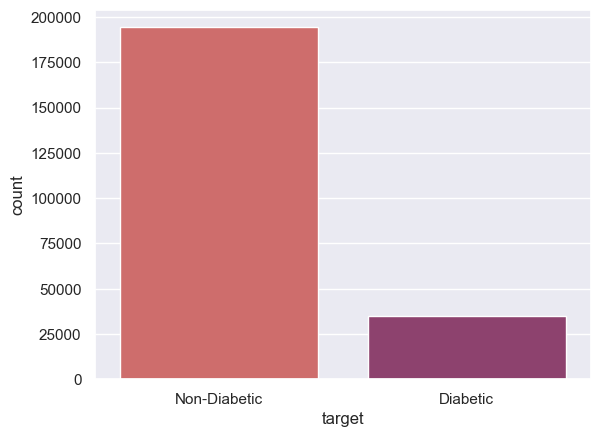

In [23]:
# count plot - target
ax = sns.countplot(data=df1, x='target', palette="flare")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'])
plt.show()

<div style="background-color:#fadbd8 ;">
  Both value counts and countplot indicates an <b>imbalanced dataset</b> in terms of target
</div>

<h2 style="color:#4d4d4d;">Balancing dataset using SMOTE</h2>

<div style="text-align: justify;"><b>SMOTE</b> (Synthetic Minority Oversampling Technique) is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.</div>

In [24]:
# from imblearn.over_sampling import SMOTE

# # separating 'target' and features
# X = df1.drop(columns=['target'])
# y = df1['target']

# smote = SMOTE(sampling_strategy=1.0, random_state=42)  # 1.0 means full balance
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
# y_resampled.value_counts()

<div style="background-color:#d5f5e3;">
Dataset is balanced by using <b>SMOTE</b>
</div>

In [26]:
# df_resampled = pd.concat([X_resampled, y_resampled],axis=1)

In [27]:
# df_resampled.to_csv('brfss_diabetes_dataset_resampled.csv');

In [28]:
df_resampled = pd.read_csv('brfss_diabetes_dataset_resampled.csv', index_col=0)

In [29]:
df_resampled.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'target'],
      dtype='object')

In [30]:
X_resampled = df_resampled.drop(columns = ['target'])

In [31]:
target = df_resampled['target']

<h1 style="color:#4d4d4d;"><b>EDA - features</b></h1>

<div style="">
<b>From the attribute information, we have:</b>
<ul>
<li>Binary categorical variables such as <i>Sex, HighChol, Smoker</i>, etc.</li>
<li>Ordinal categorical variables such as <i>GenHlth, Age, Education</i>, etc.</li>
<li>Numerical variables, including <i>MentHlth, PhysHlth, BMI</i> (BMI can be used to derive bins).</li>
</ul>
</div>

In [32]:
bin_features  =  X_resampled.nunique()[X_resampled.nunique() == 2].index

In [33]:
bin_features

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
      dtype='object')

In [34]:
len(bin_features)

14

In [35]:
num_features = ['MentHlth', 'PhysHlth', 'BMI']

In [36]:
ord_features = [feature for feature in X_resampled.columns if feature not in bin_features and feature not in num_features]

In [37]:
ord_features

['GenHlth', 'Age', 'Education', 'Income']

In [38]:
# # 14+3+4 =21 features

<h2 style="color:#4d4d4d;">Feature Engineering - Deriving BMI_Category from BMI</h2>

Rather than using BMI as a feature it would be better to categorize BMIs

In [39]:
X_resampled['BMI_Category'] = pd.cut(X_resampled['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

In [40]:
df_resampled['BMI_Category'] = X_resampled['BMI_Category']

In [41]:
X_resampled.drop(columns=['BMI'], inplace = True)

In [42]:
df_resampled.drop(columns=['BMI'], inplace = True)

In [43]:
num_features.remove('BMI')

In [44]:
ord_features.append('BMI_Category')

In [45]:
X_resampled.head()

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_Category
0,1,1,1,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3,Obese
1,0,0,0,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1,Overweight
2,1,1,1,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8,Overweight
3,1,0,1,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6,Overweight
4,1,1,1,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4,Normal


In [46]:
X_resampled.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'BMI_Category'],
      dtype='object')

In [47]:
len(X_resampled.columns)

21

<h2 style="color:#4d4d4d;"><b>EDA - Categorical Features</b></h2>

<h2>Distribution of  Categorical Features</h2>

In [48]:
# function to plot value count and pie chart ssowing distribution
def plot_count(df, feature):
    counts = df[feature].value_counts()
    print(f'Count of {feature}')
    print(counts)
    plt.figure(figsize=(7, 7))
    plt.pie(counts, labels=counts.index, autopct='%.0f%%')
    plt.title(f'Distribution of {feature}')
    plt.show()

In [49]:
categorical_features = list(bin_features)+ list(ord_features)

Count of HighBP
HighBP
1    210230
0    178524
Name: count, dtype: int64


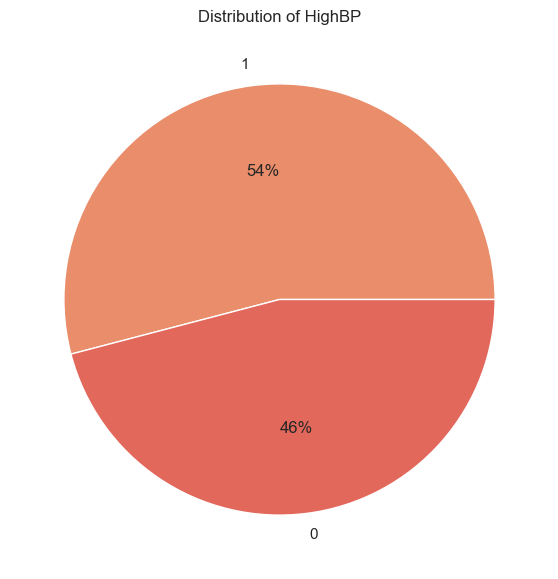

Count of HighChol
HighChol
0    198177
1    190577
Name: count, dtype: int64


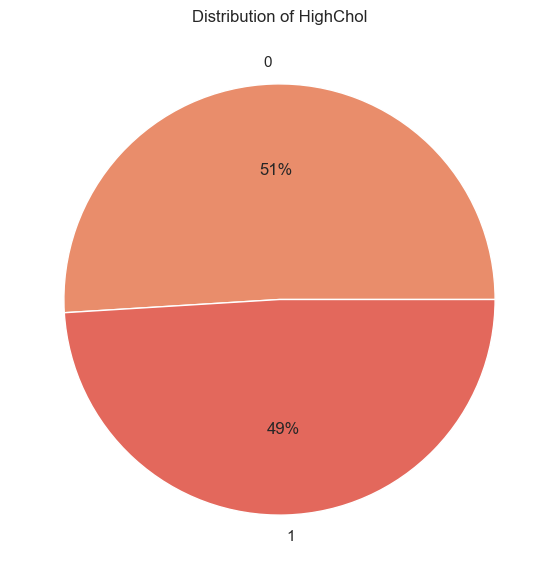

Count of CholCheck
CholCheck
1    377841
0     10913
Name: count, dtype: int64


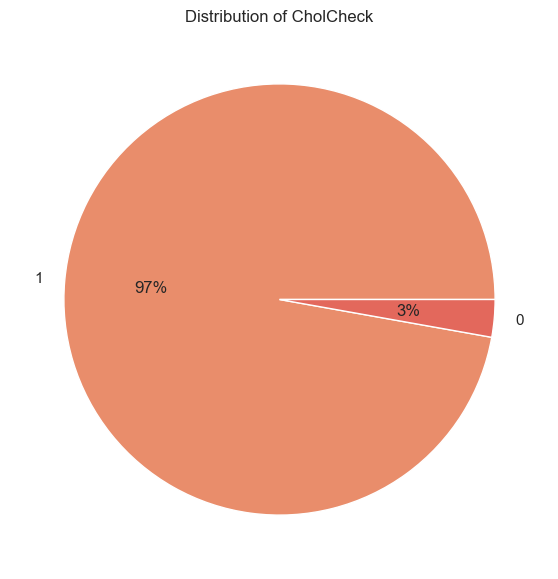

Count of Smoker
Smoker
0    222425
1    166329
Name: count, dtype: int64


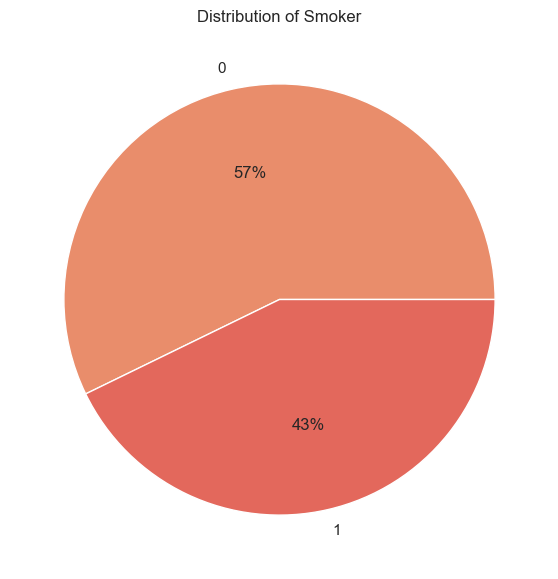

Count of Stroke
Stroke
0    375216
1     13538
Name: count, dtype: int64


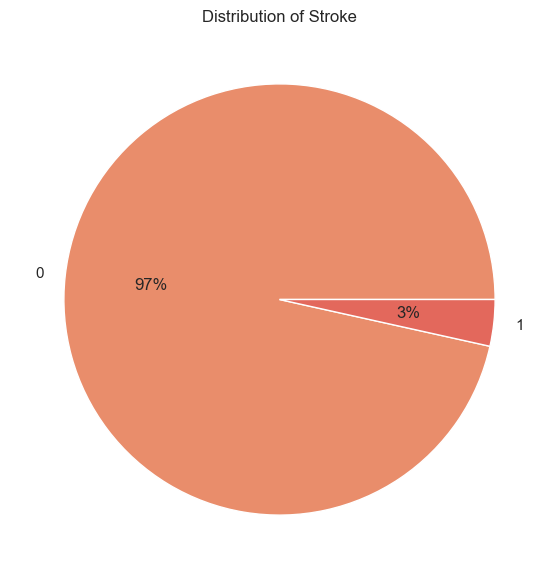

Count of HeartDiseaseorAttack
HeartDiseaseorAttack
0    348598
1     40156
Name: count, dtype: int64


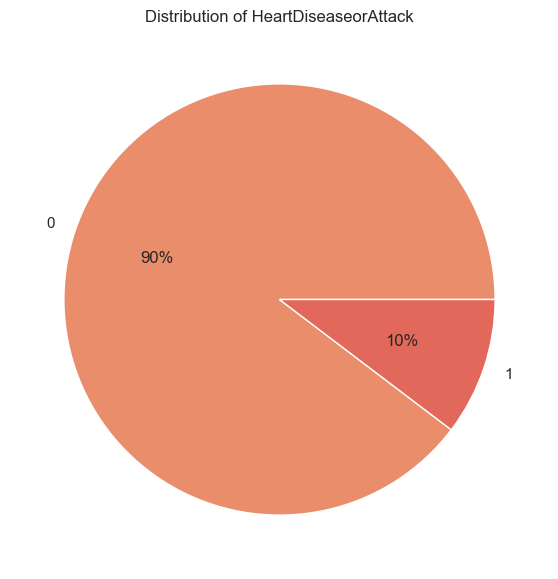

Count of PhysActivity
PhysActivity
1    249609
0    139145
Name: count, dtype: int64


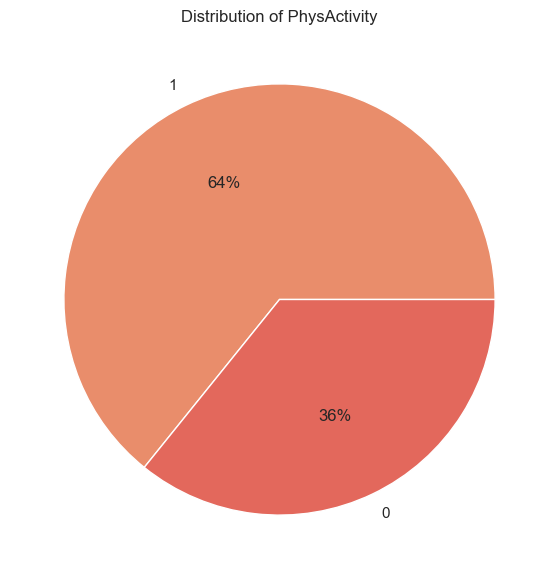

Count of Fruits
Fruits
1    213143
0    175611
Name: count, dtype: int64


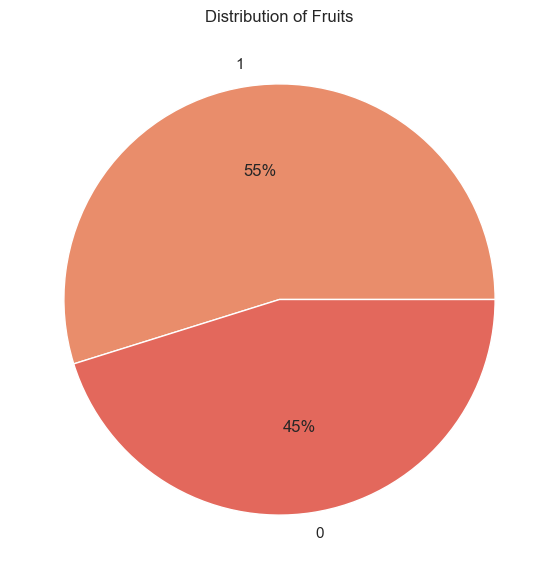

Count of Veggies
Veggies
1    287904
0    100850
Name: count, dtype: int64


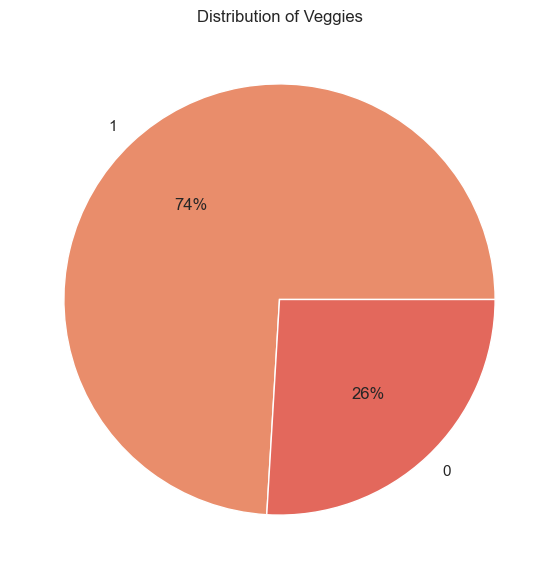

Count of HvyAlcoholConsump
HvyAlcoholConsump
0    374509
1     14245
Name: count, dtype: int64


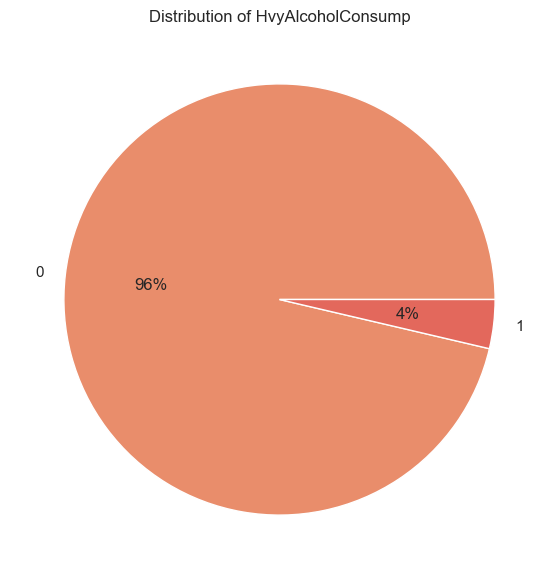

Count of AnyHealthcare
AnyHealthcare
1    367141
0     21613
Name: count, dtype: int64


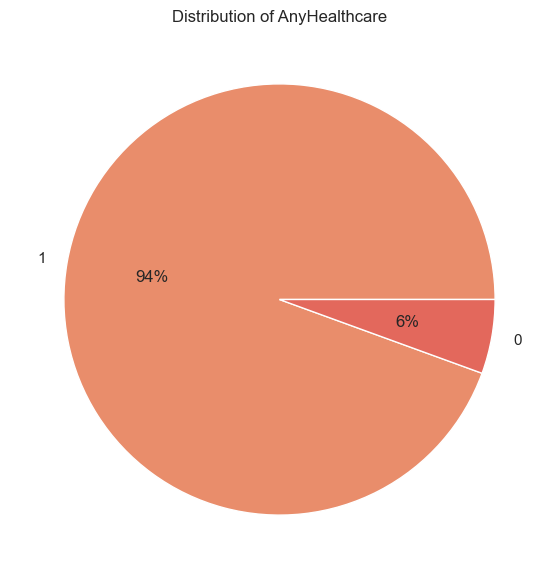

Count of NoDocbcCost
NoDocbcCost
0    363123
1     25631
Name: count, dtype: int64


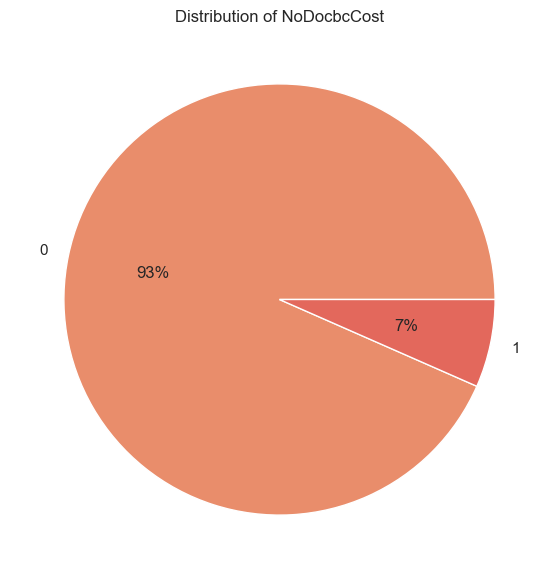

Count of DiffWalk
DiffWalk
0    305419
1     83335
Name: count, dtype: int64


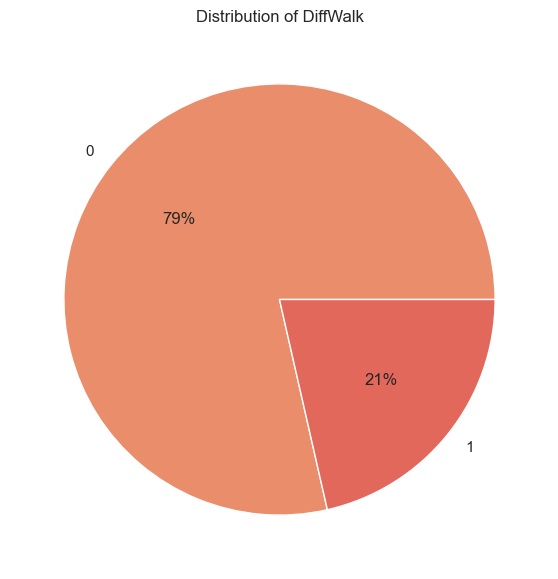

Count of Sex
Sex
0    234005
1    154749
Name: count, dtype: int64


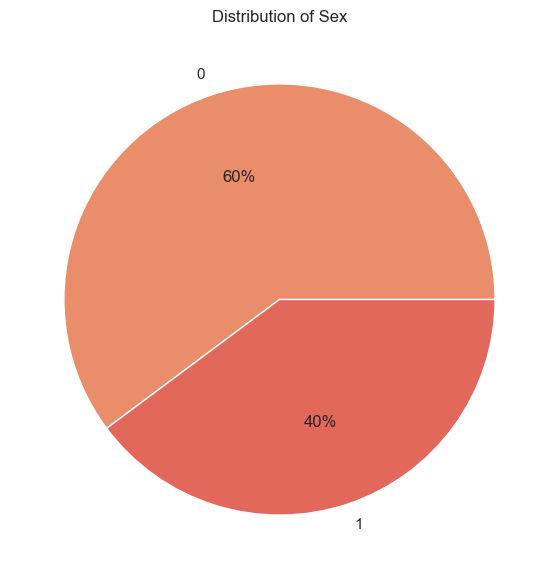

Count of GenHlth
GenHlth
3    142145
2    111674
4     71070
1     40597
5     23268
Name: count, dtype: int64


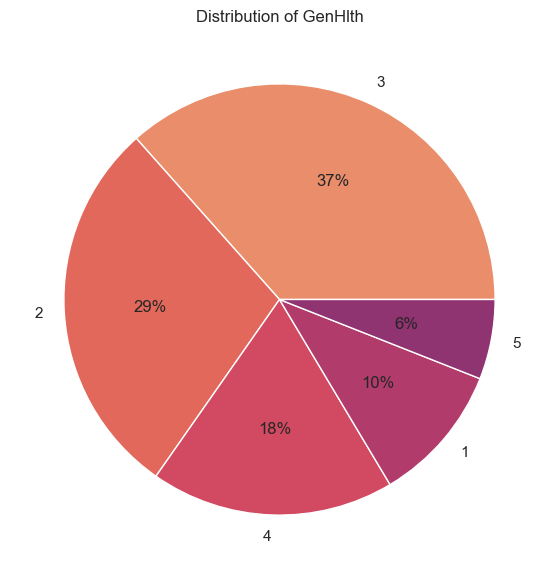

Count of Age
Age
10    59040
9     57063
8     48243
11    43594
7     38658
12    30270
13    26383
6     25921
5     19217
4     15283
3     11598
2      7673
1      5811
Name: count, dtype: int64


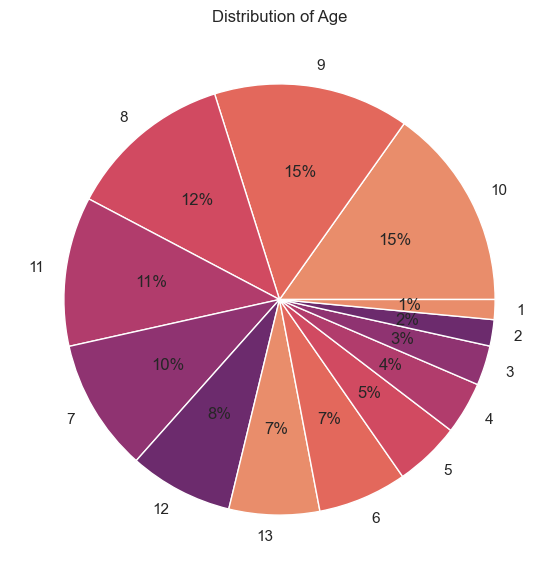

Count of Education
Education
6    121254
4    120308
5    114108
3     23015
2      9713
1       356
Name: count, dtype: int64


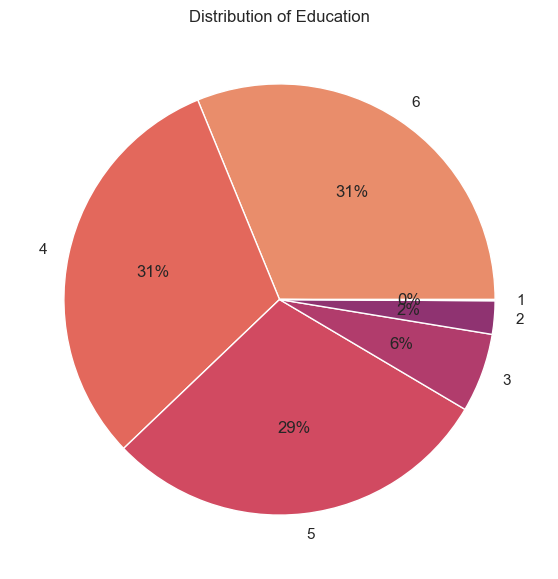

Count of Income
Income
8    96624
7    65445
6    59245
5    46140
4    38666
3    32570
2    27239
1    22825
Name: count, dtype: int64


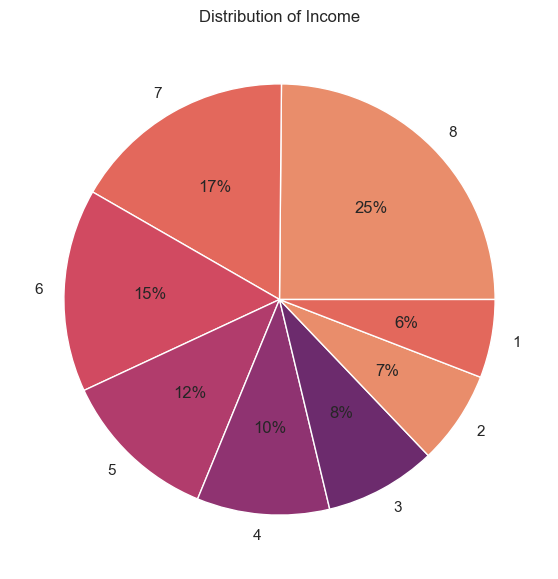

Count of BMI_Category
BMI_Category
Obese          175609
Overweight     131680
Normal          77635
Underweight      3830
Name: count, dtype: int64


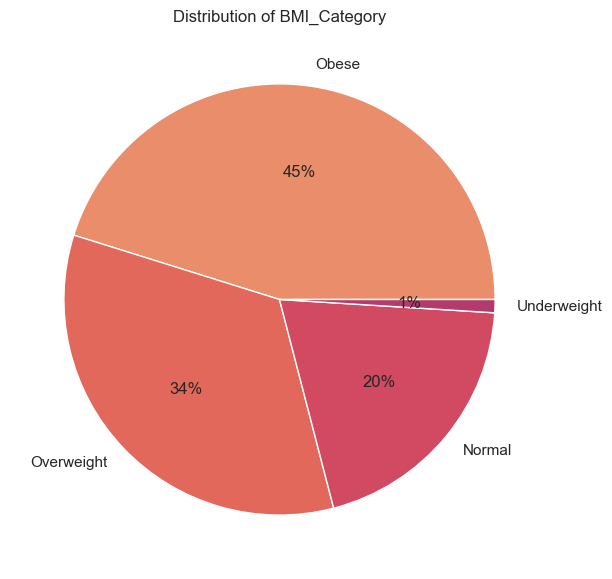

In [50]:
for feature in categorical_features:
    plot_count(X_resampled, feature)

<h2>Relationship Analysis - Categorical Features v/s target</h2>

In [51]:
# plotting cross tabulations between features and target
def plot_crosstab(df, column, target):
    crosstab = pd.crosstab(df[column], target)
    ax = crosstab.plot(kind="bar", figsize=(8, 4))
    plt.title(f'{column} VS {target.name}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    ax.legend(labels=['Non-Diabetic', 'Diabetic'], loc='upper left')
    plt.show()

In [52]:
len(categorical_features)

19

In [53]:
categorical_features

['HighBP',
 'HighChol',
 'CholCheck',
 'Smoker',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'AnyHealthcare',
 'NoDocbcCost',
 'DiffWalk',
 'Sex',
 'GenHlth',
 'Age',
 'Education',
 'Income',
 'BMI_Category']

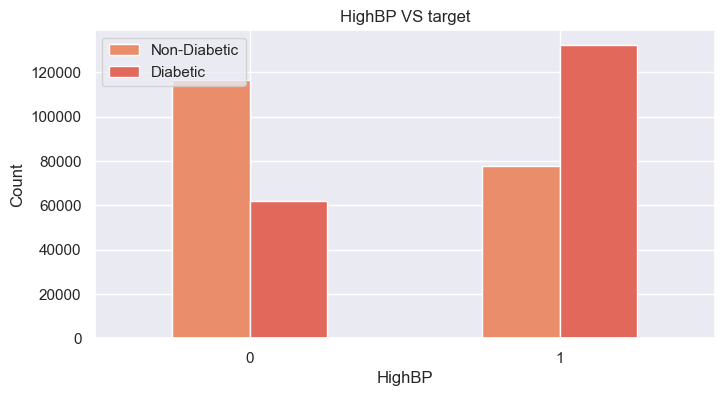

In [54]:
plot_crosstab(df_resampled, 'HighBP', target)

<div style="background-color:#d5f5e3;">
Individuals with <b>high blood pressure</b> show a <b>significantly higher incidence of diabetes</b> and vice versa.
</div>

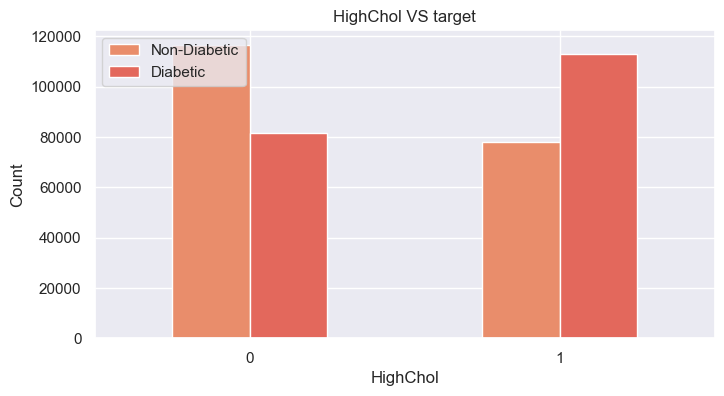

In [55]:
plot_crosstab(df_resampled, 'HighChol', target)

<div style="background-color:#d5f5e3;">
Individuals with <b>high cholestrol</b> show a <b>notably higher incidence of diabetes</b> and vice versa.
</div>

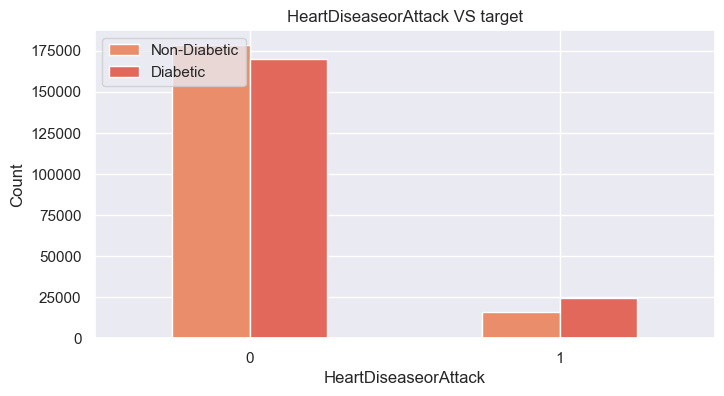

In [56]:
plot_crosstab(df_resampled, 'HeartDiseaseorAttack', target)

<div style="background-color:#d5f5e3;">
<b>Diabetic individuals show a higher incidence of heart disease/heart attack</b> or vice  versa.
</div>

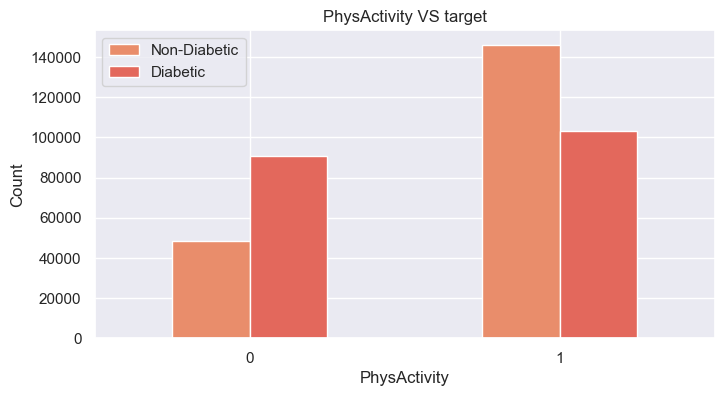

In [57]:
plot_crosstab(df_resampled, 'PhysActivity', target)

<div style="background-color:#d5f5e3;">
<b>Non-diabetic individuals tend to be more physically active overall</b> (physically active in past 30 days-not including job) .
</div>

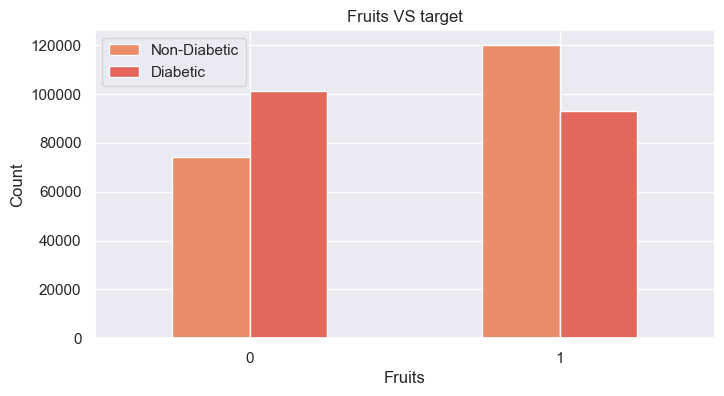

In [58]:
plot_crosstab(df_resampled, 'Fruits', target)

<div style="background-color:#d5f5e3;">
Diabetic individuals show lower daily fruit consumption and Non-diabetic individuals have better fruit consumption habits overall.
</div>

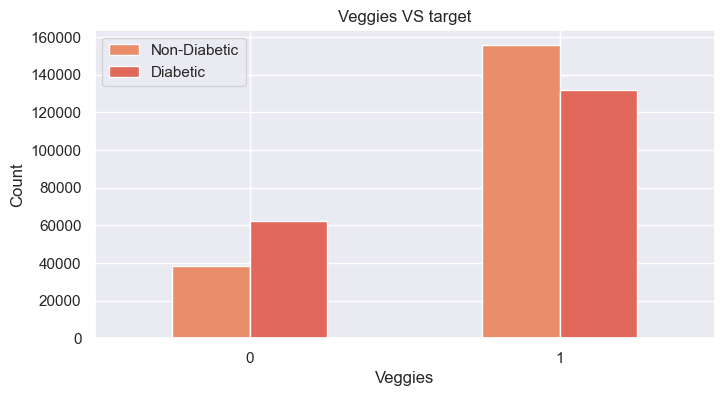

In [59]:
plot_crosstab(df_resampled, 'Veggies', target)

<div style="background-color:#d5f5e3;">
Individuals who consume vegetables 1 or more times per day have notably lower chances of diabetes
</div>

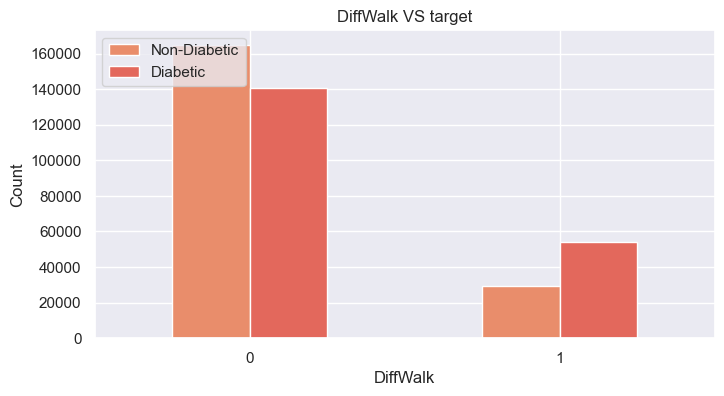

In [60]:
plot_crosstab(df_resampled, 'DiffWalk', target)

<div style="background-color:#d5f5e3;">
Serious  difficulty in walking or climbing stairs might be an indicator of pre-diabetes or diabetes
</div>

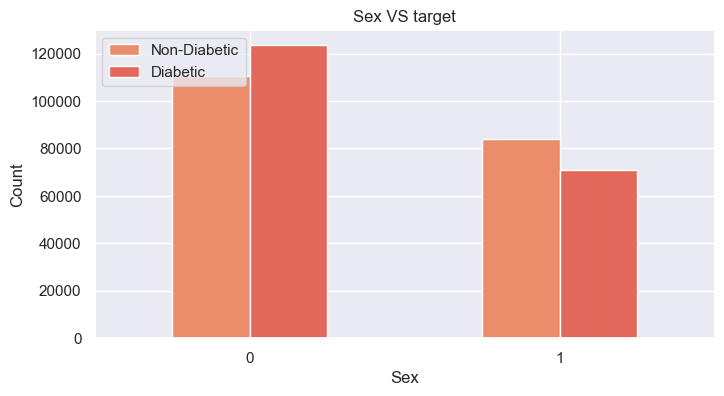

In [61]:
plot_crosstab(df_resampled, 'Sex', target)

<div style="background-color:#d5f5e3;">
Women appear to be prone to diabetes than men.
</div>

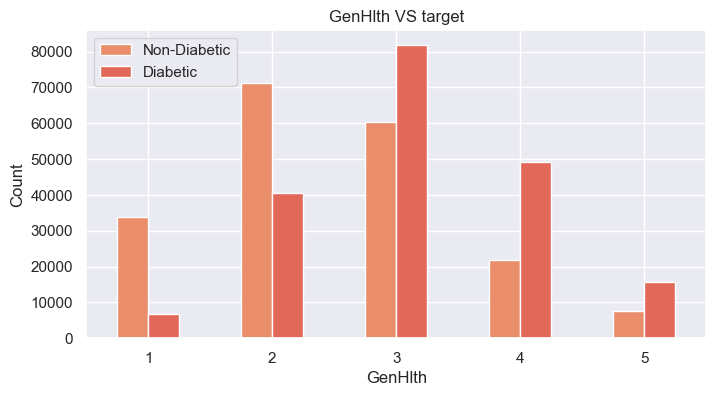

In [62]:
plot_crosstab(df_resampled, 'GenHlth', target)

<div style="background-color:#d5f5e3;">
The distribution clearly shows the impact of diabetes on perceived general health. <b>Individuals having  3 (good), 4 (fair) and 5 (poor) general helth have significally higher chances to be diagnosed with diabetes or pre-diabetes when compared to individuals with excellent (1) and very good (2) general health.</b>
</div>

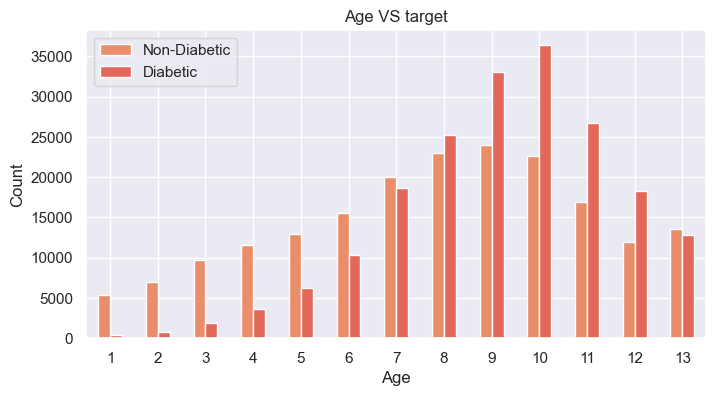

In [63]:
plot_crosstab(df_resampled, 'Age', target)

<div style="background-color:#d5f5e3;">
Diabetes prevalence clearly increases with age. <b>Middle-age to older adults show highest diabetes numbers. The peak for diabetic cases occurs in age category 10 (65-69).</b>
</div>

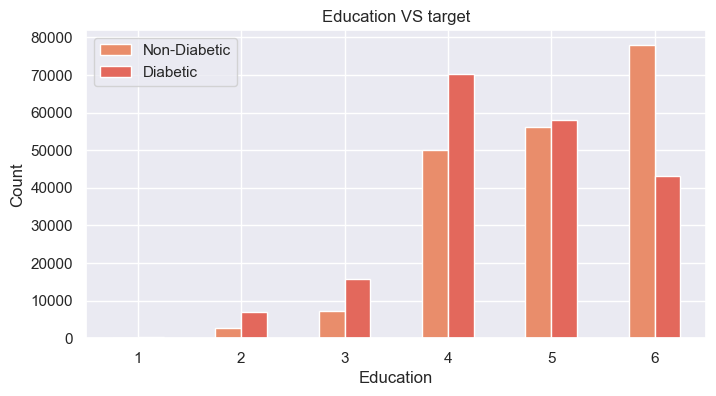

In [64]:
plot_crosstab(df_resampled, 'Education', target)

<div style="background-color:#d5f5e3;">
There's a clear relationship between education level and diabetes status. <b>Higher education levels (especially level 6 - College graduate) are associated with lower diabetes rates. Mid-level education (level 4 - High school graduate) shows the highest diabetes prevalence.</b>
</div>

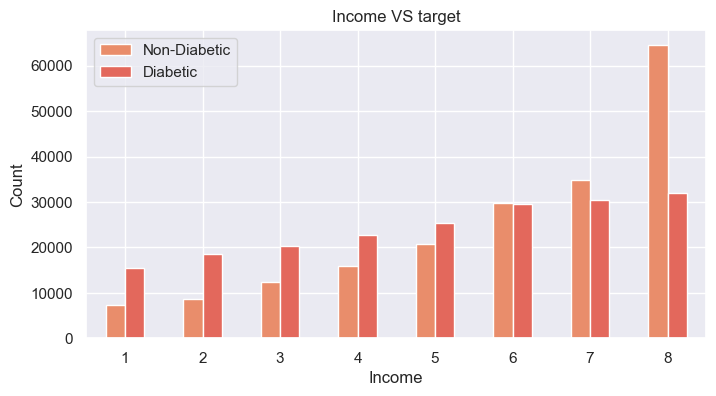

In [65]:
plot_crosstab(df_resampled, 'Income', target)

<div style="background-color:#d5f5e3;">
<b>There is a clear inverse relationship between income and diabetes prevalence</b>. Highest income group (8 - $ 75,000 or more) shows the largest disparity, with significantly more non-diabetics. Lower income groups show higher diabetes prevalence
</div>

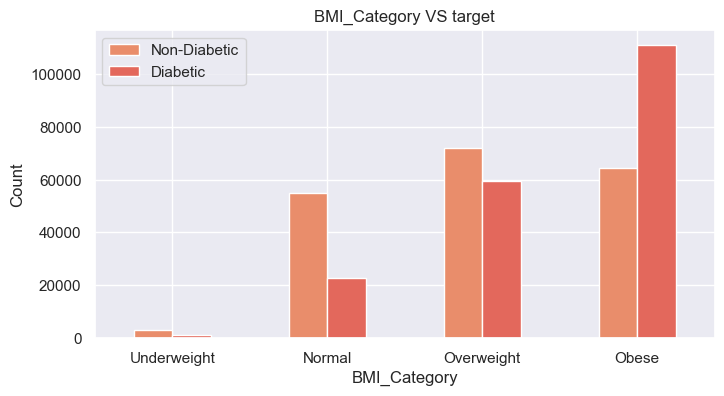

In [66]:
plot_crosstab(df_resampled, 'BMI_Category', target)

<div style="background-color:#d5f5e3;">
Visible strong correlation between BMI and diabetes status. <b>Risk of diabetes increases dramatically with BMI. Obesity shows the strongest association with diabetes. </b>
</div>

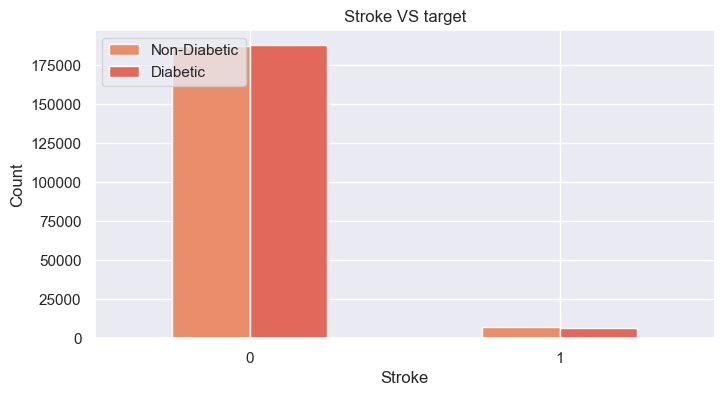

In [67]:
plot_crosstab(df_resampled, 'Stroke', target)

<div style="background-color: #fadbd8;">
Even though diabetes is a known risk factor for stroke, the entries tell a different story. This might be due to some error in entries or the synthesized data from oversampling might have altered relationship patterns.
</div>

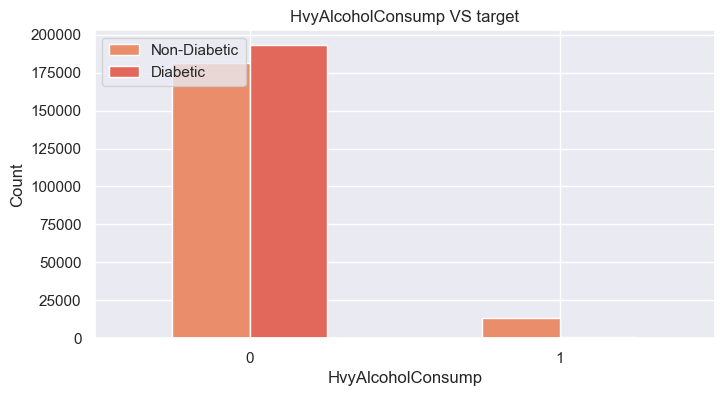

In [68]:
plot_crosstab(df_resampled, 'HvyAlcoholConsump', target)

<div style="background-color: #fadbd8;">
Heavy alcohol consumption does not indicates higher incidence of diabetes, which is odd.
</div>

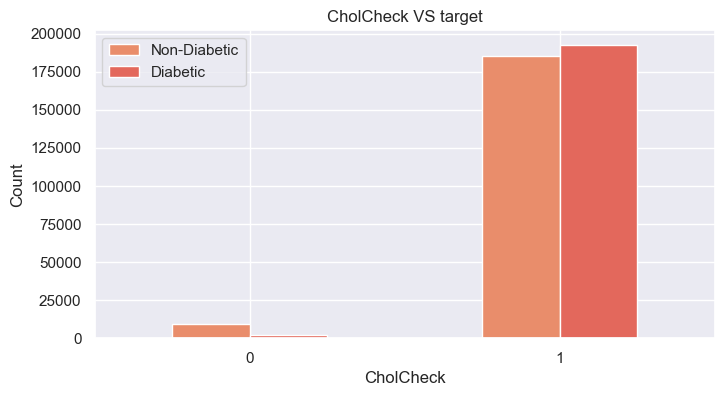

In [69]:
plot_crosstab(df_resampled, 'CholCheck', target)

<div style="background-color: #d5d8dc;">
There's a small number of both diabetic and non-diabetic individuals who haven't had their cholesterol checked. The vast majority of both diabetic and non-diabetic individuals are getting their cholesterol checked regularly.
</div>

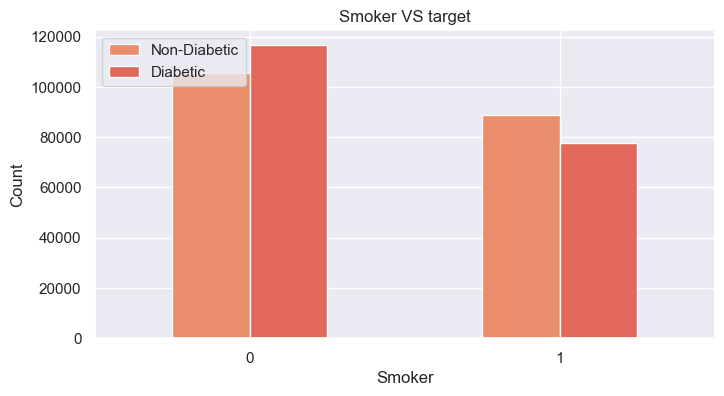

In [70]:
plot_crosstab(df_resampled, 'Smoker', target)

<div style="background-color: #d5d8dc;">
There are more non-smokers than smokers in both diabetic and non-diabetic populations
</div>

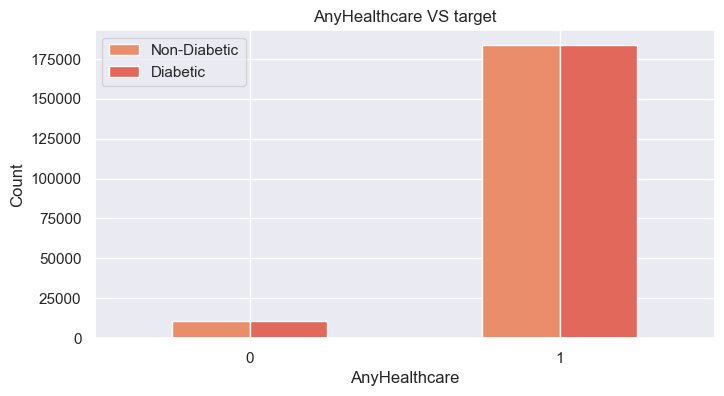

In [71]:
plot_crosstab(df_resampled, 'AnyHealthcare', target)

<div style="background-color: #d5d8dc;">
Having any kind of health care coverage does not appear to have any effect on diabetes
</div>

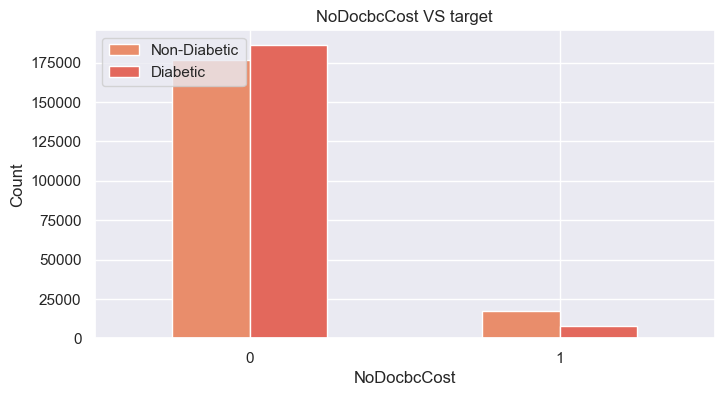

In [72]:
plot_crosstab(df_resampled, 'NoDocbcCost', target)

<div style="background-color: #d5d8dc;">
Ability of individuals to afford visit to doctors does not have a meaningful relationship with incidence of diabetes.
</div>

<h2 style="color:#4d4d4d;"><b>EDA - Numerical Features</b></h2>

<h2>Distribution of  Numerical Features</h2>

In [73]:
#defining function to plot histogram for numerical features
def plot_hist(df,feature):
    plt.figure(figsize=(12,4))
    sns.histplot(data=df, x=feature, bins = 30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

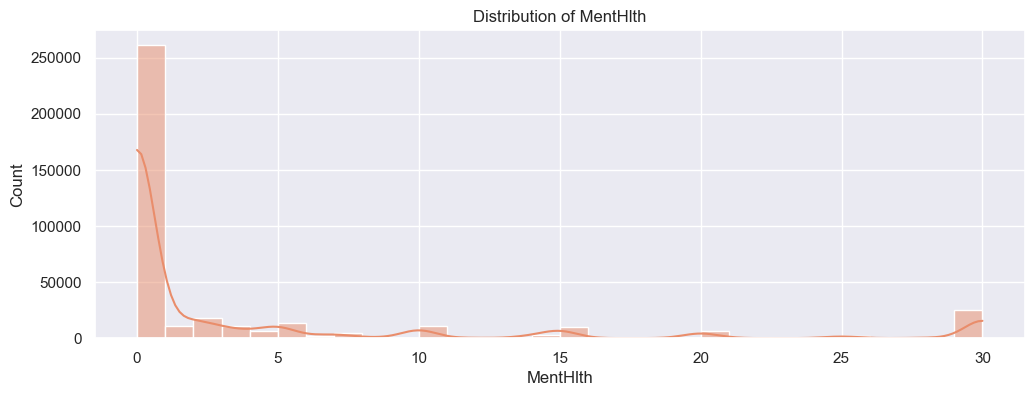

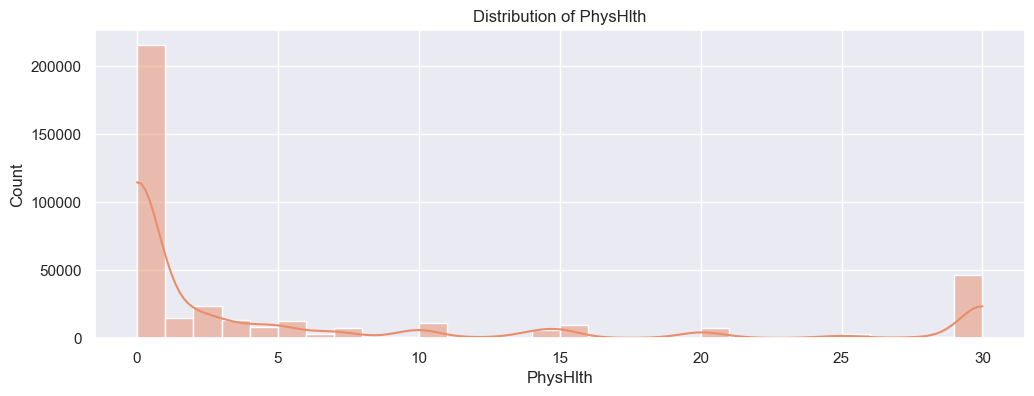

In [74]:
for feature in num_features:
    plot_hist(df_resampled,feature)

In [75]:
#defining function to plot box plots for numerical features
def plot_box(df, feature):
    plt.figure(figsize=(12,4))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.show()

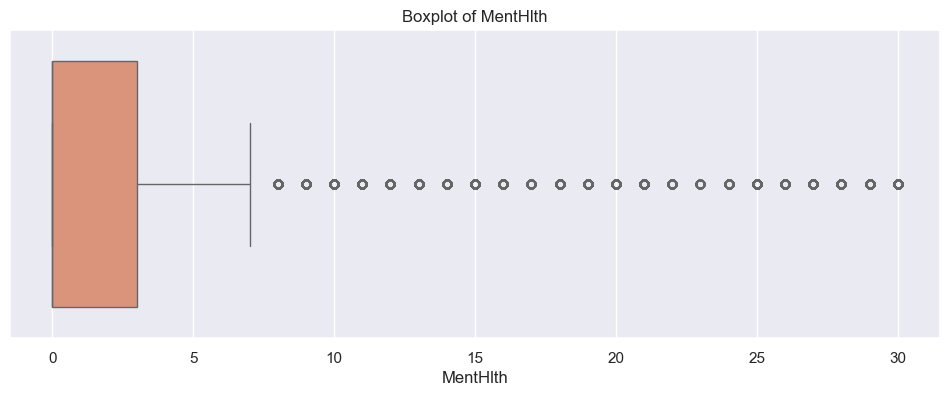

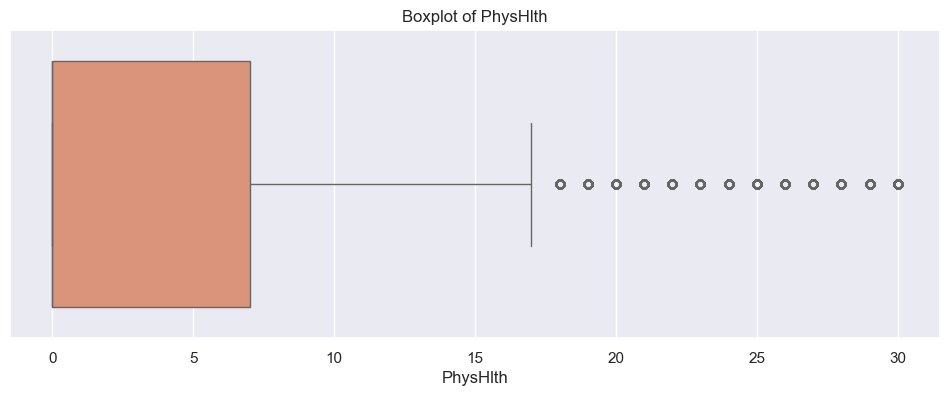

In [76]:
for feature in num_features:
    plot_box(df_resampled, feature)

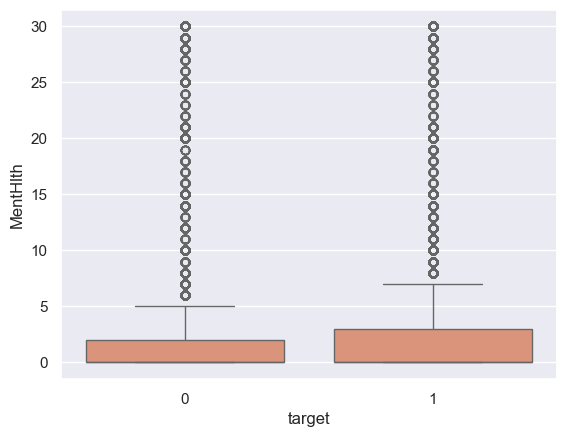

In [77]:
sns.boxplot(y = df_resampled['MentHlth'], x = target) 
plt.show()

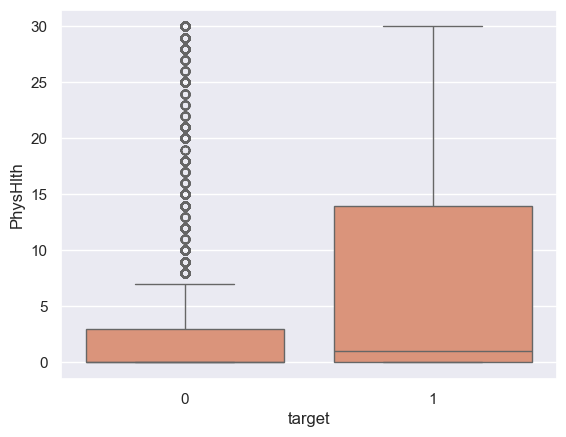

In [78]:
sns.boxplot(y = df_resampled['PhysHlth'], x = target) 
plt.show()

<div style="background-color:#d5f5e3;">
<h3>Since these are likely self-reported mental and physical health days extreme values may not necessarily be true outliers but rather valid responses. <b>Binning values</b> might be helpful here rather than keeping these as numerical features.</h3>
</div>

In [79]:
df_resampled['MntlHlthNotGood'] = pd.cut(df_resampled['MentHlth'], bins=[-1, 0, 5, 15, 30], labels=['0 days', '1-5 days', '6-15 days', '16+ days'])
df_resampled.drop(columns=['MentHlth'], inplace = True)
X_resampled['MntlHlthNotGood'] = df_resampled['MntlHlthNotGood']
X_resampled.drop(columns=['MentHlth'], inplace = True)

In [80]:
df_resampled['PhysHlthNotGood'] = pd.cut(df_resampled['PhysHlth'], bins=[-1, 0, 5, 15, 30], labels=['0 days', '1-5 days', '6-15 days', '16+ days'])
df_resampled.drop(columns=['PhysHlth'], inplace = True)
X_resampled['PhysHlthNotGood'] = df_resampled['PhysHlthNotGood']
X_resampled.drop(columns=['PhysHlth'], inplace = True)

In [81]:
df_resampled.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'target',
       'BMI_Category', 'MntlHlthNotGood', 'PhysHlthNotGood'],
      dtype='object')

In [82]:
X_resampled.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'BMI_Category',
       'MntlHlthNotGood', 'PhysHlthNotGood'],
      dtype='object')

In [83]:
df_resampled.sample(5)

,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,target,BMI_Category,MntlHlthNotGood,PhysHlthNotGood
140376,0,0,1,0,0,0,1,0,0,0,1,0,3,0,1,1,5,8,0,Normal,1-5 days,1-5 days
244809,1,1,1,0,0,0,0,0,0,0,1,0,4,1,0,11,4,5,1,Obese,0 days,16+ days
333417,1,0,1,0,0,0,0,1,1,0,1,0,3,0,1,12,6,8,1,Obese,0 days,0 days
287975,0,0,1,0,0,0,0,1,1,0,1,0,3,0,0,8,5,5,1,Obese,0 days,1-5 days
181959,0,0,1,1,0,0,1,1,1,0,1,0,2,0,0,4,5,3,0,Overweight,0 days,0 days


In [84]:
ord_features.append(['PhysHlthNotGood', 'MntlHlthNotGood'])

<h2>Distribution and Relationship Analysis of  Derived Features</h2>

Count of PhysHlthNotGood
PhysHlthNotGood
0 days       215654
1-5 days      72541
16+ days      60437
6-15 days     40122
Name: count, dtype: int64


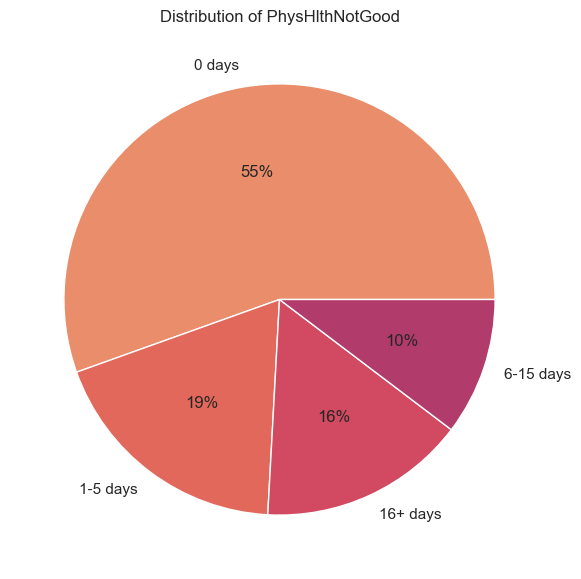

In [85]:
plot_count(X_resampled, 'PhysHlthNotGood')

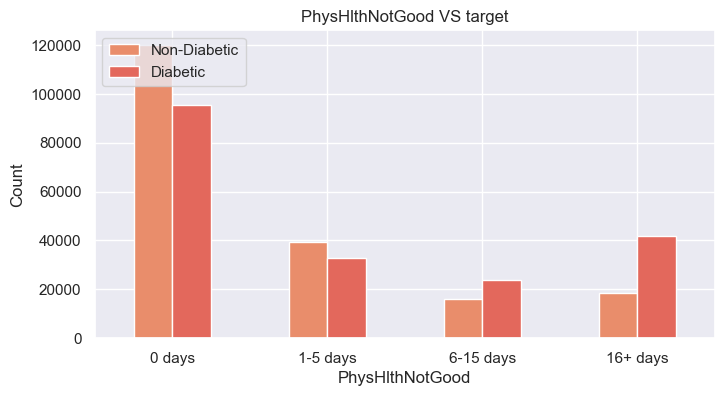

In [86]:
plot_crosstab(df_resampled, 'PhysHlthNotGood', target)

Count of MntlHlthNotGood
MntlHlthNotGood
0 days       261443
1-5 days      60209
16+ days      35553
6-15 days     31549
Name: count, dtype: int64


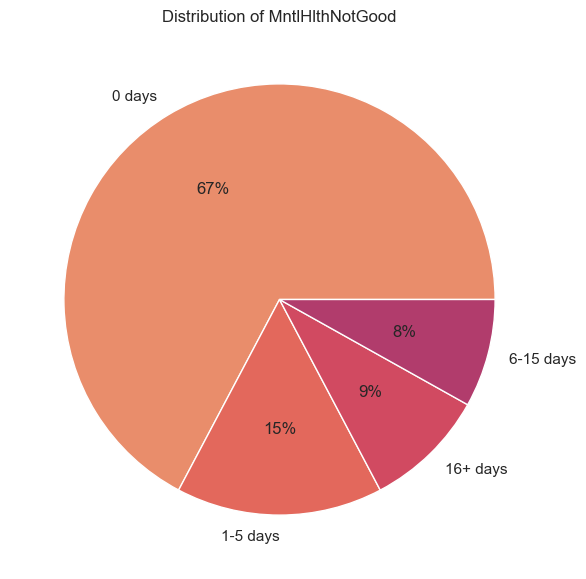

In [87]:
plot_count(X_resampled, 'MntlHlthNotGood')

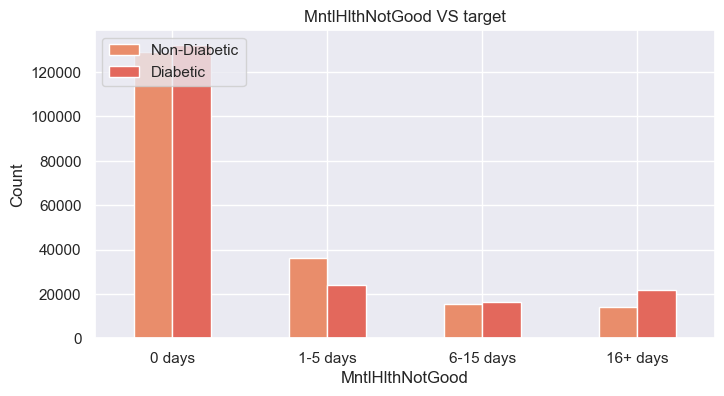

In [88]:
plot_crosstab(df_resampled, 'MntlHlthNotGood', target)

<div style="background-color:#d5f5e3;">
Relationship analysis indicates that <b>individuals with their physical or mental health not good for more than 6 days have significantly higher chances for incidence of diabetes</b>.
</div>

In [89]:
# df_resampled.columns

In [90]:
# len(df_resampled.columns)

In [91]:
df_resampled.to_csv('dataset_for_preprocessing.csv')

[**Next**: Notebook - Preprocessing and Model Deployment](./Diabetes_Prediction_upto_EDA.ipynb)